# Comparing Different Types of Cells

In this section we will discuss how to interact with different types of cells and take a look at how we can, analyze, draw connections, and plot differences between our cell types. We will be covering Humans vs Mice, how to utilize the Allens data of Cre lines, looking at diferences between differing dendrite types, and learn how to inspect the different layers of cortex. 

In [2]:
#Import the "Cell Types Cache" from the AllenSDK core package
from allensdk.core.cell_types_cache import CellTypesCache

#Import CellTypesApi, which will allow us to query the database.
from allensdk.api.queries.cell_types_api import CellTypesApi

# Import Toolkits 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

# We'll then initialize the cache as 'ctc' (cell types cache)
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')

print('Packages were successfully imported.')

Packages were successfully imported.


## Humans vs Mice

As stated in previous sections, the `get_cells` method downloads metadata for all cells in the database. By specifying a species within the method, `get_cells` will only retrieve the data from the species of interest. Our database has two species to work with; mice and humans.  To download our human cells you would need to specify `species = [CellTypesApi.HUMAN]` within `get_cells()`.

In [3]:
# Download meatadata for only human cells 
human_cells = pd.DataFrame(ctc.get_cells(species=[CellTypesApi.HUMAN])).set_index('id')

# Download electrophysiology data 
ephys_df = pd.DataFrame(ctc.get_ephys_features()).set_index('specimen_id')

# Combine our ephys data with our metadata for human cells 
human_ephys_df = human_cells.join(ephys_df)
human_ephys_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
id,,,,,,,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,...,4.134987,1.375253,-53.968754,-59.510420,-71.197919,2.895461,2.559876,3.099787,-88.843758,-70.561035
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,...,NaN,1.051160,-67.468758,NaN,-70.875002,1.891881,NaN,1.989616,-101.000000,-69.209610
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,...,5.694547,1.389900,-52.125004,-51.520836,-72.900002,3.121182,3.464528,3.054681,-87.531250,-72.628105
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,...,9.962780,1.211020,-53.875004,-52.416668,-73.693753,4.574865,3.817988,4.980603,-84.218758,-72.547661
596020931,None,"[66.0, 220.0, 105.0]",Homo Sapiens,H17.06.009.11.04.02,4,12141,MTG,,aspiny,NA,...,14.667340,1.336668,-63.593754,-63.239583,-75.518753,1.452890,1.441754,1.556087,-82.531250,-74.260269


The dataset also includes metadata on mouse cells. To download our mouse cells you would need to specify `species = [CellTypesApi.MOUSE]` within `get_cells()`.

In [4]:
# Download meatadata for only mouse cells 
mouse_cells = pd.DataFrame(ctc.get_cells(species = [CellTypesApi.MOUSE])).set_index('id')

# Combine our mouse metadata with electrophysiology data 
mouse_ephys_df = mouse_cells.join(ephys_df)
mouse_ephys_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
id,,,,,,,,,,,,,,,,,,,,,
565871768,positive,"[8966.56330957526, 1429.52689052075, 8567.3896...",Mus musculus,Oxtr-2A-Cre;Ai14-293837.03.01.02,5,385,VISp,Oxtr-T2A-Cre,aspiny,NA,...,14.738000,1.391268,-59.281254,-57.468754,-75.756252,1.564027,1.304349,1.679550,-87.906258,-74.926987
469801138,positive,"[7872.53138541818, 993.212032389272, 3127.1530...",Mus musculus,Pvalb-IRES-Cre;Ai14-170927.05.02.01,4,385,VISp,Pvalb-IRES-Cre,aspiny,NA,...,11.763808,1.290815,-55.875000,-52.515627,-69.109379,1.162618,1.197155,1.369171,-80.156250,-72.042976
605889373,positive,"[9400.0, 1520.74232706376, 2188.13845194139]",Mus musculus,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,2/3,385,VISp,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,aspiny,NA,...,8.432940,1.315510,-48.187500,-54.364586,-72.640628,3.379321,4.108774,2.680139,-83.593758,-72.712036
485909730,positive,"[8881.0, 953.839501299405, 7768.22695782726]",Mus musculus,Cux2-CreERT2;Ai14-205530.03.02.01,5,385,VISp,Cux2-CreERT2,spiny,intact,...,2.888133,1.520193,-54.031254,-57.385419,-77.750005,3.042933,3.517684,3.274181,-101.000000,-76.928391
323865917,positive,"[8125.0, 904.841803028986, 7819.69986630448]",Mus musculus,Scnn1a-Tg3-Cre;Ai14-172530.06.01.01,5,385,VISp,Scnn1a-Tg3-Cre,spiny,intact,...,3.467847,1.317042,-57.281254,-56.895833,-70.218751,2.974194,3.156117,2.946463,-88.406250,-69.402855


If you are having trouble with `get_cells()`, look through <a href="https://allensdk.readthedocs.io/en/latest/allensdk.core.cell_types_cache.html">the documentation for the CellTypesCache</a> for more information.

Let's get some information about our cells. We can use `len()` on a dataframe to get the number of rows. Alternatively, we can use the `count()` method on our dataframe to get the number of values each column contains. The number of rows is equivalent to the number of observations (i.e. length of the dataframe). 

In [6]:
print(human_cells_df.count())
n_human_cells = len(human_cells_df)
print('\nLength of dataframe:')
print(n_human_cells)

reporter_status            0
cell_soma_location       413
species                  413
name                     413
structure_layer_name     413
structure_area_id        413
structure_area_abbrev    413
transgenic_line          413
dendrite_type            413
apical                   413
reconstruction_type      158
disease_state            413
donor_id                 413
structure_hemisphere     413
normalized_depth         162
dtype: int64

Length of dataframe:
413


In [7]:
print(mouse_df.count())
n_mouse_cells = len(mouse_df)
print('\nLength of dataframe:')
print(n_mouse_cells)

reporter_status          1920
cell_soma_location       1920
species                  1920
name                     1920
structure_layer_name     1920
structure_area_id        1920
structure_area_abbrev    1920
transgenic_line          1920
dendrite_type            1920
apical                   1920
reconstruction_type       509
disease_state            1920
donor_id                 1920
structure_hemisphere     1920
normalized_depth         1297
dtype: int64

Length of dataframe:
1920


We can see that there are more mouse cells stored in the database than human cells.

Now that we have dataframes for both human and mouse cells, we can compare their electrophysiological properties and plot some graphs for data visualization. Lets start by comparing the resting membrane potential of human cells vs mouse cells using a boxplot. 

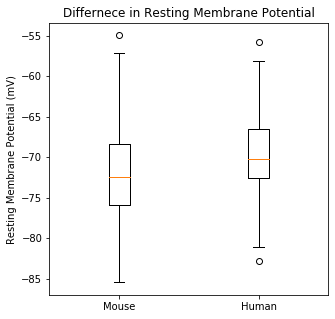

In [5]:
# Select feature we would like to plot 
feat = 'vrest'

# Store our data 
data = ([mouse_ephys_df[feat], human_ephys_df[feat]])

# Setup our figure
plt.figure(figsize = (5,5))
plt.boxplot(data)
plt.ylabel('Resting Membrane Potential (mV)')
plt.xticks([1,2],['Mouse', 'Human'])
plt.title('Differnece in Resting Membrane Potential')

# Show the plot
plt.show()

As you can see, the median and distribution of resting membrane potential between mouse cells and human cells is similar. This is good to know cosidering that mice are frequently used to conduct experiments to research human physiology. 

For more information on `matplotlib.pyplot` and the figures that you can build with it, please visit <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html">here</a>.

## Two Different Cre-Lines 

What if we want to know whether different genetically-identified cells have different intrinsic physiology? The Allen Institute for Brain Science uses transgenic mouse lines that have Cre-expressing cells to mark specific types of cells in the brain. Lets find out what cre-lines are availabe in our mouse data under the column `transgenic_line`. 

We can take a look at how many different values are stored within a column using the `.unique()` method.

In [9]:
mouse_ephys_df['transgenic_line'].unique()

array(['Oxtr-T2A-Cre', 'Pvalb-IRES-Cre',
       'Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre', 'Cux2-CreERT2',
       'Scnn1a-Tg3-Cre', 'Htr3a-Cre_NO152', 'Rorb-IRES2-Cre',
       'Ctgf-T2A-dgCre', 'Nkx2-1-CreERT2', 'Vip-IRES-Cre',
       'Chrna2-Cre_OE25', 'Nos1-CreERT2|Sst-IRES-FlpO', 'Scnn1a-Tg2-Cre',
       'Nos1-CreERT2', 'Ntsr1-Cre_GN220', 'Esr2-IRES2-Cre',
       'Tlx3-Cre_PL56', 'Vipr2-IRES2-Cre',
       'Chrna2-Cre_OE25|Pvalb-T2A-Dre', 'Nr5a1-Cre', 'Ndnf-IRES2-dgCre',
       'Sst-IRES-Cre', 'Gad2-IRES-Cre', 'Chat-IRES-Cre-neo',
       'Slc17a6-IRES-Cre', 'Sim1-Cre_KJ18', 'Glt25d2-Cre_NF107',
       'Rbp4-Cre_KL100', 'Penk-IRES2-Cre-neo',
       'Htr3a-Cre_NO152|Pvalb-T2A-Dre', 'Esr2-IRES2-Cre|PhiC31-neo',
       'Gng7-Cre_KH71', 'Pvalb-T2A-FlpO|Vipr2-IRES2-Cre',
       'Pvalb-T2A-CreERT2', 'Esr2-IRES2-Cre-neo|PhiC31-neo',
       'Esr2-IRES2-Cre-neo', 'Vipr2-IRES2-Cre-neo'], dtype=object)

Next, lets select two different Cre lines from the dataset and create dataframes that only contain cells from those Cre lines. For more information on the Allen Cell Types Cre lines, please visit <a href="https://docs.google.com/document/d/1ZMMZgc7cS5BHhoWNqzjw95BdxOuj5wrYl9I7PV2HeUI/edit">the Allen Cell Types Cre Lines Glossary</a> for a short description of the cortical expression patterns of the transgenic Cre lines available in the Allen Cell Types dataset.

**Note**: Be sure that you are using the entire name of the Cre line -- that means everything within the single quotes above.

In [6]:
# Choose your column of comparison 
column = 'transgenic_line'

# Choose your Cre lines of interest 
cre_line_1 = 'Oxtr-T2A-Cre'
cre_line_2 = 'Pvalb-IRES-Cre'

# Create dataframes from the selected Cre lines above
cre_line_1_df = mouse_ephys_df[mouse_ephys_df[column]==cre_line_1]
cre_line_2_df = mouse_ephys_df[mouse_ephys_df[column]==cre_line_2]

# Get the length of each dataframe
print(str(len(cre_line_1_df)) + ' cells with cre line' + ' ' + cre_line_1 )
print(str(len(cre_line_2_df)) + ' cells with cre line' + ' ' + cre_line_2 )

46 cells with cre line Oxtr-T2A-Cre
217 cells with cre line Pvalb-IRES-Cre


Now that we have two Cre lines to compare, we can begin to plot their physiology and check for differneces. Let's start by plotting a distribution of the recorded resting membrane potential (vrest) for our two different Cre lines.

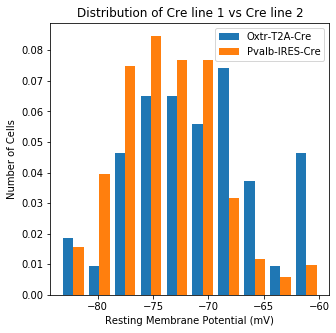

In [7]:
# Modify this line to change the dimensions of your plot
plt.figure(figsize=(5,5))

# Choose the parameter you would like to plot 
parameter = 'vrest'

# Plot the histogram, with density = True 
plt.hist([cre_line_1_df[parameter],cre_line_2_df[parameter]],density = True)
plt.xlabel('Resting Membrane Potential (mV)')
plt.ylabel('Number of Cells')
plt.legend([cre_line_1,cre_line_2])
plt.title('Distribution of Cre line 1 vs Cre line 2')

# Show the plot
plt.show()

Since the number of cells greatly differs between our cre lines, it would be more appropriate to plot a boxplot than plotting the distributions.

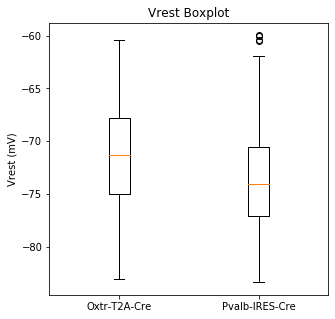

In [8]:
# Modify this line to change the dimensions of your plot
plt.figure(figsize=(5,5))

# Choose the parameter you would like to plot 
parameter = 'vrest'

# Plot the Boxplot 
plt.boxplot([cre_line_1_df[parameter],cre_line_2_df[parameter]])
plt.ylabel('Vrest (mV)')
plt.xticks([1, 2], [cre_line_1,cre_line_2])
plt.title('Vrest Boxplot')

# Show the plot
plt.show()

## Spiny vs Aspiny 

The Allen cells contains cells of different dedrite types. To find out what dendrite types make up our cells, we can execute `unique()` on the `dendrite_type` column of our dataframe. 

In [15]:
print(human_cells_df['dendrite_type'].unique())

['spiny' 'aspiny' 'sparsely spiny']


We can plot some of the metrics for our different dendrite types. Let's look at the frequency of each dendrite type. `value_counts()` is a method that will count up the number of instances of each value.
`plot()` is a Pandas method that will plot, depending on the `kind` argument you give it.

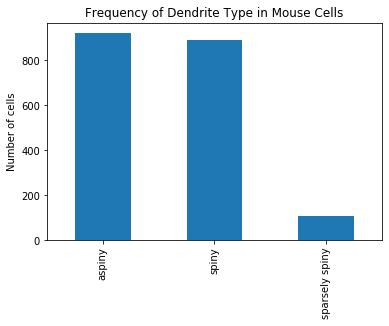

In [9]:
# For the different values in dendrite_type column, get the value_counts, 
# and plot as a bar plot
mouse_ephys_df['dendrite_type'].value_counts().plot(kind='bar')

plt.ylabel('Number of cells')
plt.title('Frequency of Dendrite Type in Mouse Cells')

# Show the plot
plt.show()

Let's see how the different dendrite types differ when it comes to their electrophysiological properties. Below we will filter out cells by dendrite type and assign them to their repective dataframe. 

In [10]:
# Select your cell types for comparison 
cell_type1 = 'spiny'
cell_type2 = 'aspiny'
cell_type3 = 'sparsely spiny'

# Create your cell type specific daaframes 
spiny_df = mouse_ephys_df[mouse_ephys_df['dendrite_type']== cell_type1]
aspiny_df = mouse_ephys_df[mouse_ephys_df['dendrite_type']== cell_type2]
sparsely_spiny_df = mouse_ephys_df[mouse_ephys_df['dendrite_type']== cell_type3]

print('Dataframes successfully created.')

Dataframes successfully created.


Next, we select an electrophysiological feature that we could like to compare across the three dendrite types. In this example, we will be taking a look at `fast_though_v_long_square` for each of our dendrite types and create a boxplot. 

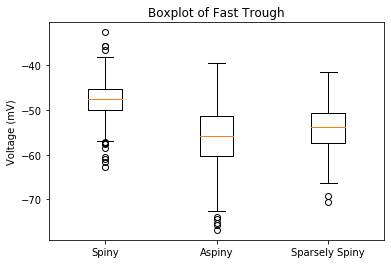

In [11]:
# Choose what you would like to compare between the cell types 
feature = 'fast_trough_v_long_square'
spiny_ft = spiny_df[feature]
aspiny_ft = aspiny_df[feature]
sparsely_spiny_ft = sparsely_spiny_df[feature]

# Store your data 
data = [spiny_ft,aspiny_ft,sparsely_spiny_ft]

# Plot your figure 
fig,ax = plt.subplots()
ax.boxplot(data)
ax.set_title('Boxplot of Fast Trough')
ax.set_xticklabels(['Spiny', 'Aspiny','Sparsely Spiny'])
ax.set_ylabel('Voltage (mV)')

# Show the plot
plt.show()

## Layers of Cortex: Depth 

The Allen also contains information from what layer of cortex the cells in the dataset are harvested from. Like before, we can execute `unique()` on our column of interest again to see what layers our mouse cells are coming from. 

In [19]:
print(mouse_ephys_df['structure_layer_name'].unique())

['5' '4' '2/3' '6a' '6b' '1']


Knowing what layers our cells are coming from allows us to check for any strong differences in electrophysiological, morphological features between different layers. Below we will walk through how to choose structure layers to compare, created our dataframes from our selcted structure layers, and eventually plot some metrics of these layers. 

In [12]:
# Select the structure layers you would like to compare
layer_1 = '1'
layer_2 = '4'

# Setup the dataframes that only contain cells from our layers of interest 
mouse_1_df = mouse_ephys_df[mouse_ephys_df['structure_layer_name']==layer_1]
mouse_4_df = mouse_ephys_df[mouse_ephys_df['structure_layer_name']==layer_2]

print('Dataframes successfully created.')

Dataframes successfully created.


Once we have set up our dataframes, we are able to plot out some of the morphological and electrophysiological features and attempt to draw connections between the two layers. Below we will create boxplots that compares cells from layers 1 and 4 with respect to the rheobase, resting membrane potential, and membrane time constant.

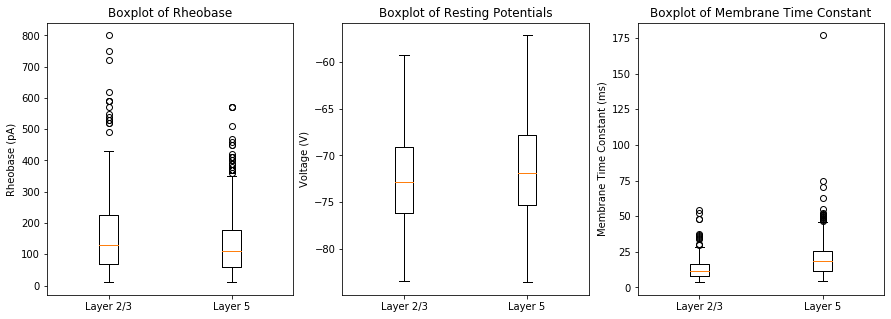

In [21]:
# Create a 1 by 3 figure for our boxplots 
fig, ax = plt.subplots(1,3, figsize = (15,5))

# Setup our dataframes for rheobase
bp1_feature = 'threshold_i_long_square'
threshold_i_long_square_mouse_1_ft = mouse_1_df[bp1_feature]
threshold_i_long_square_mouse_4_ft = mouse_4_df[bp1_feature]

# Store our data for rheobase
threshold_i_long_square_data = [threshold_i_long_square_mouse_1_ft,
                                threshold_i_long_square_mouse_4_ft]

# On the first graph, plot the rheobase
ax[0].boxplot(threshold_i_long_square_data)
ax[0].set_xticklabels(['Layer 1','Layer 4'])
ax[0].set_ylabel('Rheobase (pA)')
ax[0].set_title('Boxplot of Rheobase')

# Setup our dataframes for resting membrane potential
bp2_feature = 'vrest'
vrest_mouse_1_ft = mouse_1_df[bp2_feature].dropna() # Drop missing values 
vrest_mouse_4_ft = mouse_4_df[bp2_feature].dropna() # Drop missing values 

# Store our data for vrest
vrest_data = [vrest_mouse_1_ft,vrest_mouse_4_ft]

# On the second graph, create the box plot of resting potential
ax[1].boxplot(vrest_data)
ax[1].set_xticklabels(['Layer 1','Layer 4'])
ax[1].set_ylabel('Voltage (V)')
ax[1].set_title('Boxplot of Resting Potentials')

# Setup our dataframes for membrane time constant
bp3_feature = 'tau'
tau_mouse_1_ft = mouse_1_df[bp3_feature].dropna() # Drop missing values 
tau_mouse_4_ft = mouse_4_df[bp3_feature].dropna() # Drop missing values 

# Store our data for membrane time constant 
tau_data = [tau_mouse_1_ft,tau_mouse_4_ft]

# On the third graph, create a box plot of Membrane Time Constant 
ax[2].boxplot(tau_data)
ax[2].set_xticklabels(['Layer 1','Layer 4'])
ax[2].set_ylabel('Membrane Time Constant (ms)')
ax[2].set_title('Boxplot of Membrane Time Constant')

# Show the plot
plt.show()